Figure 6: Performance of n-fold ensembled ms-C/L models

In [1]:
%pylab inline
import pickle
import glob
import os
import pandas as pd
import numpy as np
import sys

sys.path.insert(0, ".")

import seaborn as sns

sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")


def pd_full(rows=100):
    pd.set_option("display.max_rows", rows)
    pd.set_option("display.max_columns", None)
    pd.set_option("display.width", 2000)
    pd.set_option("display.float_format", "{:20,.3f}".format)
    pd.set_option("display.max_colwidth", None)


pd_full()

Duplicate key in file '/home/ubuntu/.config/matplotlib/matplotlibrc' line #2.
Duplicate key in file '/home/ubuntu/.config/matplotlib/matplotlibrc' line #3.


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load relevant experiment script
import scripts.run_ensemble_exp as exp
from filternet.training.evalmodel import *
from filternet.training.ensemble_train import *

In [3]:
# Load saved models produced by script.
model_dirs = [os.path.split(p)[0] for p in glob.glob(exp.saved_model_glob)]
model_dirs

['saved_models/ensembles_3_3_folds_4',
 'saved_models/ensembles_3_5_folds_3',
 'saved_models/ensembles_3_3_folds_7',
 'saved_models/ensembles_3_4_folds_8',
 'saved_models/ensembles_3_4_folds_1',
 'saved_models/ensembles_3_3_folds_8',
 'saved_models/ensembles_3_5_folds_0',
 'saved_models/ensembles_3_4_folds_7',
 'saved_models/ensembles_3_4_folds_2',
 'saved_models/ensembles_3_3_folds_3',
 'saved_models/ensembles_3_2_folds_3',
 'saved_models/ensembles_3_4_folds_3',
 'saved_models/ensembles_3_2_folds_6',
 'saved_models/ensembles_3_4_folds_9',
 'saved_models/ensembles_3_5_folds_7',
 'saved_models/ensembles_3_2_folds_9',
 'saved_models/ensembles_3_5_folds_8',
 'saved_models/ensembles_3_5_folds_9',
 'saved_models/ensembles_3_3_folds_5',
 'saved_models/ensembles_3_4_folds_6',
 'saved_models/ensembles_3_3_folds_9',
 'saved_models/ensembles_3_2_folds_1',
 'saved_models/ensembles_3_3_folds_1',
 'saved_models/ensembles_3_4_folds_0',
 'saved_models/ensembles_3_3_folds_6',
 'saved_models/ensembles_

In [4]:
# Create dataframe summarizing metrics/info extracted
#  from the saved models.

df_run_records = []

for i, model_dir in enumerate(model_dirs):
    print(f"{i}/{len(model_dirs)}")
    try:
        # The ensemble model
        em = load_eval_model_from_dir(model_dir)

        df_run_records.append(
            {
                "model_dir": model_dir,
                "run_type": f"{em.extra['num_folds']}-fold ensemble",
                "n_folds": em.extra["num_folds"],
                "i_repeat": em.extra["i_repeat"],
                "f1w": em.f1,
                "f1m": em.f1_mean,
                "f1w_nn": em.nonull_f1,
                "event_f1": em.event_f1,
                "t_infer": em.infer_time_s_wall,
                "ksamp_per_s": em.infer_samples_per_s / 1000,
            }
        )

        # Now load the ensemble's sub-models
        for model_dir in [t.model_path for t in em.trainer.trainers]:
            emt = load_eval_model_from_dir(model_dir)

            df = emt.trainer.train_state.to_df()
            s = df.loc[emt.trainer.cp_iter]

            df_run_records.append(
                {
                    "model_dir": model_dir,
                    "run_type": f"{em.extra['num_folds']}-fold sub-model",
                    "n_folds": em.extra["num_folds"],
                    "i_repeat": em.extra["i_repeat"],
                    "loss": s.val_loss,
                    "f1w": emt.f1,
                    "f1m": emt.f1_mean,
                    "f1w_nn": emt.nonull_f1,
                    "event_f1": emt.event_f1,
                    "t_infer": emt.infer_time_s_wall,
                    "ksamp_per_s": emt.infer_samples_per_s / 1000,
                    "train_iter_s": df.iter_s_cpu.mean(),
                    "cp_iter": emt.trainer.cp_iter,
                    "train_s": emt.trainer.cp_iter * df.iter_s_cpu.mean(),
                }
            )
    except:
        print("FAIL")
        pass

0/40
1/40
2/40
3/40
4/40
5/40
6/40
7/40
8/40
9/40
10/40
11/40
12/40
13/40
14/40
15/40
16/40
17/40
18/40
19/40
20/40
21/40
22/40
23/40
24/40
25/40
26/40
27/40
28/40
29/40
30/40
31/40
32/40
33/40
34/40
35/40
36/40
37/40
38/40
39/40


In [5]:
###
# Explore dataframe...

In [6]:
df_run_records = pd.DataFrame(df_run_records)
df_run_records["ensemble"] = df_run_records.run_type.str.contains("ensemble")
df_run_records

,model_dir,run_type,n_folds,i_repeat,f1w,f1m,f1w_nn,event_f1,t_infer,ksamp_per_s,loss,train_iter_s,cp_iter,train_s,ensemble
0,saved_models/ensembles_3_3_folds_4,3-fold ensemble,3,4,0.922,0.729,0.906,0.855,0.615,384.748,nan,nan,nan,nan,True
1,saved_models/ensembles_3_3_folds_4/0/,3-fold sub-model,3,4,0.919,0.721,0.888,0.841,0.231,"1,025.949",0.304,4.900,18.000,88.209,False
2,saved_models/ensembles_3_3_folds_4/1/,3-fold sub-model,3,4,0.906,0.679,0.837,0.770,0.228,"1,039.210",0.376,4.885,28.000,136.794,False
3,saved_models/ensembles_3_3_folds_4/2/,3-fold sub-model,3,4,0.911,0.648,0.842,0.809,0.228,"1,035.333",0.595,4.825,18.000,86.854,False
4,saved_models/ensembles_3_5_folds_3,5-fold ensemble,5,3,0.937,0.764,0.919,0.877,0.936,252.663,nan,nan,nan,nan,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,saved_models/ensembles_3_5_folds_1/0/,5-fold sub-model,5,1,0.923,0.709,0.888,0.817,0.228,"1,035.278",0.404,4.927,22.000,108.404,False
176,saved_models/ensembles_3_5_folds_1/1/,5-fold sub-model,5,1,0.919,0.691,0.869,0.825,0.229,"1,033.354",0.291,4.938,26.000,128.393,False
177,saved_models/ensembles_3_5_folds_1/2/,5-fold sub-model,5,1,0.914,0.663,0.864,0.793,0.226,"1,044.493",0.341,4.930,28.000,138.039,False
178,saved_models/ensembles_3_5_folds_1/3/,5-fold sub-model,5,1,0.916,0.697,0.898,0.817,0.228,"1,038.398",0.397,4.949,32.000,158.370,False


In [7]:
# Avg performance?
cols = [
    "run_type",
    "f1w",
    "f1m",
    "f1w_nn",
    "event_f1",
    "t_infer",
    "ksamp_per_s",
    "loss",
    "train_iter_s",
    "cp_iter",
    "train_s",
]
df_mean = df_run_records.groupby("run_type")[cols].mean().sort_index()
df_mean

,f1w,f1m,f1w_nn,event_f1,t_infer,ksamp_per_s,loss,train_iter_s,cp_iter,train_s
run_type,,,,,,,,,,
2-fold ensemble,0.890,0.617,0.850,0.774,0.471,501.995,nan,nan,nan,nan
2-fold sub-model,0.860,0.558,0.762,0.678,0.227,"1,041.438",0.835,4.932,18.000,88.682
3-fold ensemble,0.929,0.740,0.915,0.874,0.631,375.142,nan,nan,nan,nan
3-fold sub-model,0.914,0.690,0.869,0.799,0.232,"1,018.381",0.468,4.903,36.100,177.138
4-fold ensemble,0.933,0.755,0.918,0.872,0.780,303.276,nan,nan,nan,nan
4-fold sub-model,0.918,0.705,0.880,0.814,0.225,"1,051.184",0.427,4.906,40.250,197.494
5-fold ensemble,0.934,0.754,0.918,0.875,0.928,255.079,nan,nan,nan,nan
5-fold sub-model,0.923,0.713,0.886,0.826,0.228,"1,036.251",0.347,4.920,37.360,183.798


In [8]:
# Dispersion?
df_std = df_run_records.groupby("run_type")[cols].std().sort_index()
df_std

,f1w,f1m,f1w_nn,event_f1,t_infer,ksamp_per_s,loss,train_iter_s,cp_iter,train_s
run_type,,,,,,,,,,
2-fold ensemble,0.013,0.042,0.023,0.040,0.008,8.848,nan,nan,nan,nan
2-fold sub-model,0.054,0.103,0.110,0.111,0.005,25.546,0.141,0.053,7.691,37.551
3-fold ensemble,0.003,0.012,0.009,0.014,0.011,6.504,nan,nan,nan,nan
3-fold sub-model,0.010,0.031,0.023,0.037,0.003,14.976,0.168,0.055,12.075,59.763
4-fold ensemble,0.003,0.016,0.009,0.010,0.017,6.692,nan,nan,nan,nan
4-fold sub-model,0.011,0.031,0.020,0.037,0.004,18.945,0.106,0.033,11.315,55.545
5-fold ensemble,0.003,0.013,0.005,0.008,0.015,4.253,nan,nan,nan,nan
5-fold sub-model,0.006,0.024,0.017,0.021,0.005,19.625,0.045,0.034,15.121,74.388


In [9]:
# how many of each?
df_run_records.groupby("run_type").model_dir.count()

run_type
2-fold ensemble     10
2-fold sub-model    20
3-fold ensemble     10
3-fold sub-model    30
4-fold ensemble     10
4-fold sub-model    40
5-fold ensemble     10
5-fold sub-model    50
Name: model_dir, dtype: int64

In [10]:
####
# Viz results

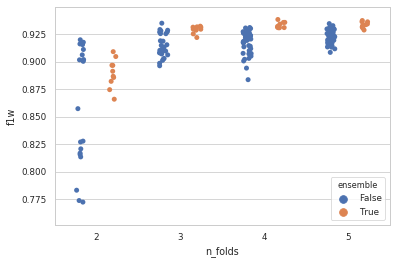

In [11]:
# Strip plot just to see the points
sns.stripplot(
    data=df_run_records, x="n_folds", y="f1w", hue="ensemble", jitter=True, dodge=True
)

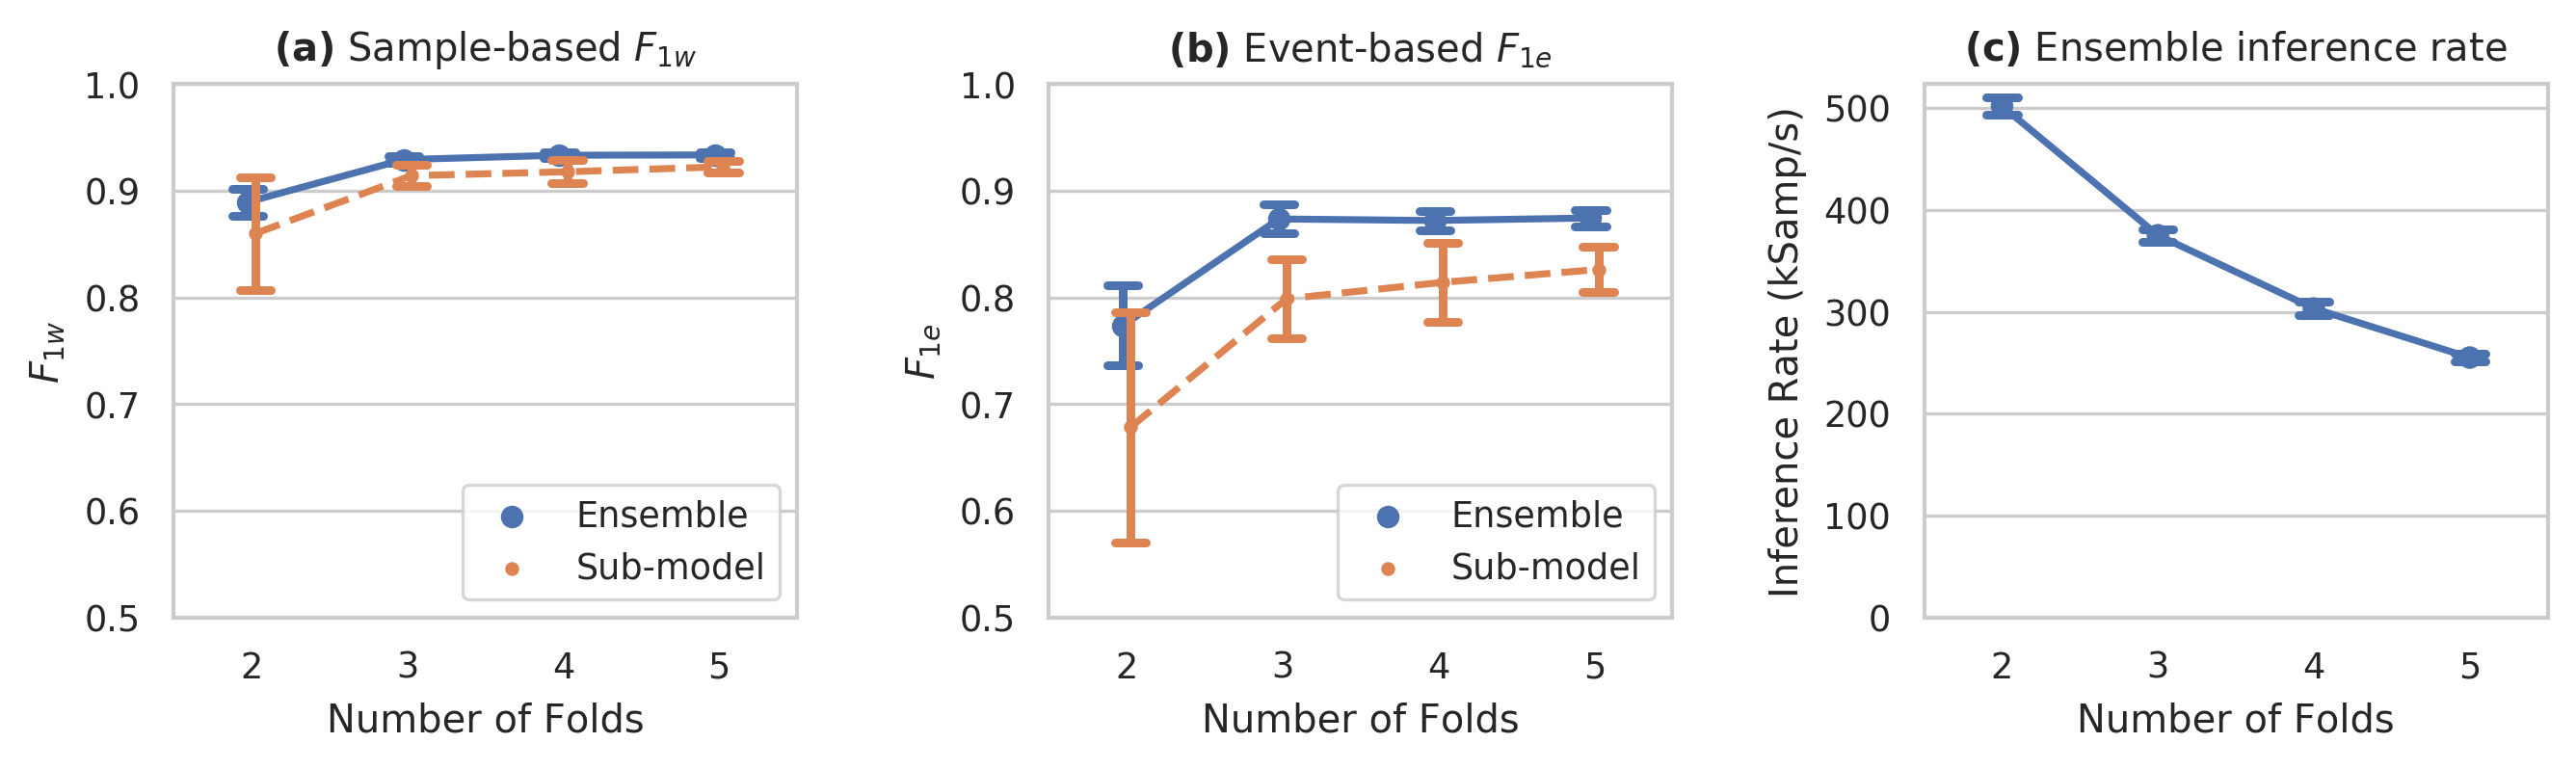

In [12]:
###
# Plot for paper

scale = 0.8
dodge = True
kwargs = dict(
    data=df_run_records,
    x="n_folds",
    hue="Model Type",
    kind="point",
    dodge=dodge,
    ci="sd",
    capsize=0.2,
    hue_order=["Ensemble", "Sub-model"],
    linestyles=["-", "--"],
    markers=["o", "."],
    scale=scale,
)

f, axes = subplots(1, 3, figsize=[9, 2.75], dpi=300)


df_run_records.loc[df_run_records.ensemble, "Model Type"] = "Ensemble"
df_run_records.loc[~df_run_records.ensemble, "Model Type"] = "Sub-model"
sca(axes[0])
sns.pointplot(y="f1w", **kwargs)
legend(loc="lower right")
xlabel("Number of Folds")
ylabel("$F_{1w}$")  #'F1 (weighted)')
title("$\\bf{(a)}$ Sample-based $F_{1w}$")
ylim([0.5, 1])


df_run_records.loc[df_run_records.ensemble, "Model Type"] = "Ensemble"
df_run_records.loc[~df_run_records.ensemble, "Model Type"] = "Sub-model"
sca(axes[1])
sns.pointplot(y="event_f1", **kwargs)
legend(loc="lower right")
xlabel("Number of Folds")
ylabel("$F_{1e}$")  # ylabel('Event F1')
title("$\\bf{(b)}$ Event-based $F_{1e}$")
ylim([0.5, 1])


df_run_records.loc[df_run_records.ensemble, "Model Type"] = "Ensemble"
df_run_records.loc[~df_run_records.ensemble, "Model Type"] = "Sub-model"
sca(axes[2])
sns.pointplot(
    data=df_run_records[df_run_records.ensemble],
    x="n_folds",
    y="ksamp_per_s",
    kind="point",
    ci="sd",
    capsize=0.2,
    scale=scale,
)
# legend(['hi'], loc='lower right')
xlabel("Number of Folds")
ylabel("Inference Rate (kSamp/s)")
title("$\\bf{(c)}$ Ensemble inference rate")
ylim([0, None])

tight_layout(w_pad=2.5)

plt.savefig('ensemble_effects.png')
